In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("C:\\Users\\pc\\Downloads\\heart_disease_cleaned.csv")

In [19]:
X = df.drop(columns=["num"])
y = df["num"]

In [20]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [21]:
importances = rf.feature_importances_
feat_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

C:\Users\pc\AppData\Local\Temp\ipykernel_12740\2808549706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feat_importance, palette="viridis")


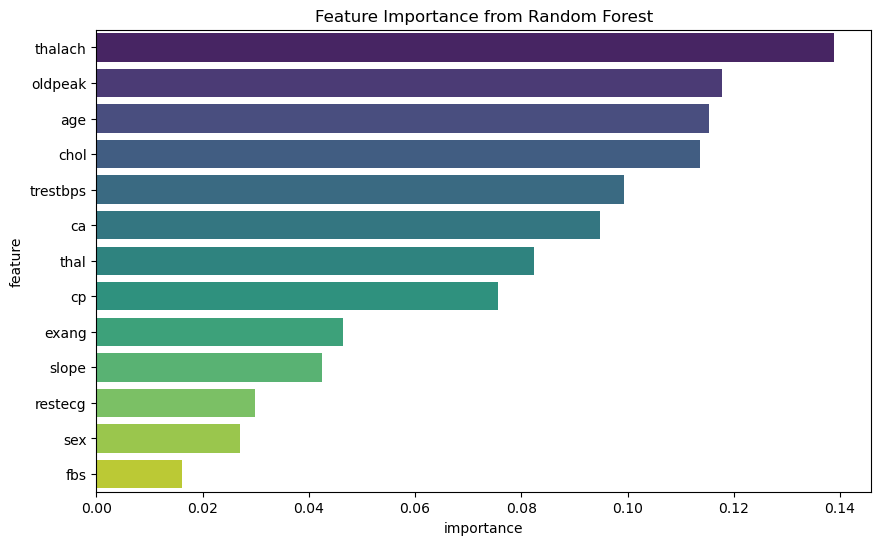

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_importance, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features.tolist())

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected features by RFE: ['sex', 'fbs', 'exang', 'slope', 'ca']


In [15]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)  # chi2 requires non-negative
chi_scores, p_values = chi2(X_scaled, y)

chi_df = pd.DataFrame({
    "feature": X.columns,
    "chi2_score": chi_scores,
    "p_value": p_values
}).sort_values(by="chi2_score", ascending=False)

print(chi_df)

     feature  chi2_score       p_value
12      thal   48.191147  8.610385e-10
8      exang   39.119182  6.582518e-08
11        ca   35.737851  3.276208e-07
9    oldpeak   15.887988  3.173210e-03
10     slope   13.533319  8.943579e-03
2         cp    7.991380  9.189448e-02
1        sex    7.511646  1.111968e-01
5        fbs    6.778461  1.480690e-01
6    restecg    6.513217  1.639595e-01
7    thalach    3.194716  5.257848e-01
0        age    1.244537  8.707128e-01
3   trestbps    0.637719  9.587814e-01
4       chol    0.177620  9.962823e-01


In [22]:
selected = ["cp", "thal", "ca", "oldpeak", "exang", "age"]  # top features affect num
df_selected = df[selected + ["num"]]
df_selected.to_csv("C:/Users/pc/Downloads/heart_selected.csv", index=False)